Data Averaging: The 3D Finite Element Analysis (FEA) data is averaged along the Z-axis (thickness of the solder pad) to reduce dimensionality and capture critical mechanical behaviors influencing solder joint failure.
Grid Interpolation: A uniform grid size is defined based on the largest number of nodes in the analysis. Linear interpolation is performed to estimate creep strain at these points, ensuring consistent input shapes for the CNN.
Normalization: The data is normalized to ensure that the CNN receives consistent and comparable input values, aiding in faster convergence and stable training.

# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.width', None)  # Use None to try to display everything on one line
pd.set_option('display.max_colwidth', None)  # Ensure full width of columns if possible

# Define the path to the text file
# file_path = r'D:\Journal\All_export_2D_grid_all_check _current\simulation_sac105_without_copper_non_linear\cree\Top_21660.txt'
file_path = r'..\OneDrive_2025-03-03\LED_data_for prediction\Dataset\Data_preprocessing_2D_CNN\Data_All\Data\SAC105\FCGB1_sac105.npy'

In [2]:
arr = np.load(file_path)
df = pd.DataFrame(arr, columns=['X Location (µm)', 'Y Location (µm)', 'Z Location (µm)', 'NLCREQ (µm/µm)'])
arr, df

(array([[-8.0952e+02, -1.5095e+03, -6.6996e+02,  1.1103e-01],
        [-8.0952e+02, -1.5095e+03, -6.8496e+02,  3.9228e-02],
        [-8.0952e+02, -1.5095e+03, -6.9996e+02,  9.1925e-02],
        ...,
        [ 1.7088e+02, -1.5250e+03, -6.5496e+02,  9.3018e-02],
        [ 1.5567e+02, -1.5250e+03, -6.5496e+02,  9.2100e-02],
        [ 1.4047e+02, -1.5250e+03, -6.5496e+02,  8.2658e-02]],
       shape=(71076, 4)),
        X Location (µm)  Y Location (µm)  Z Location (µm)  NLCREQ (µm/µm)
 0              -809.52          -1509.5          -669.96        0.111030
 1              -809.52          -1509.5          -684.96        0.039228
 2              -809.52          -1509.5          -699.96        0.091925
 3              -809.52          -1509.5          -714.96        0.373020
 4              -794.32          -1509.5          -669.96        0.104670
 ...                ...              ...              ...             ...
 71071           201.29          -1525.0          -654.96        0.091

In [3]:
# Extract each column into separate variables
X_Location = df['X Location (µm)']
Y_Location = df['Y Location (µm)']
Z_Location = df['Z Location (µm)']
NLCREQ = df['NLCREQ (µm/µm)']

# Print the first few elements of each variable
print("X Location:", X_Location.shape)
print("Y Location:", Y_Location.shape)
print("Z Location:", Z_Location.shape)
print("NLCREQ:", NLCREQ.shape)

X Location: (71076,)
Y Location: (71076,)
Z Location: (71076,)
NLCREQ: (71076,)


In [4]:
# print the file name
print(file_path.split('\\')[-1])

# Calculate the length in each direction
print()
print("X Length(µm):", X_Location.max() - X_Location.min())
print("Y Length(µm):", Y_Location.max() - Y_Location.min())
print("Z Length(µm):", Z_Location.max() - Z_Location.min())
print("NLCREQ Length(µm/µm):", NLCREQ.max() - NLCREQ.min())

FCGB1_sac105.npy

X Length(µm): 1650.0
Y Length(µm): 2050.0
Z Length(µm): 75.0
NLCREQ Length(µm/µm): 0.503507


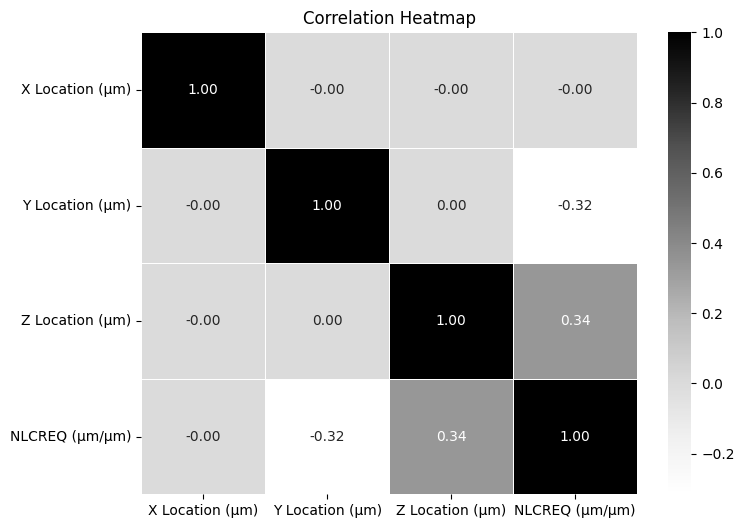

In [5]:
# Calculate the correlation matrix
corr_matrix = df[['X Location (µm)', 'Y Location (µm)', 'Z Location (µm)', 'NLCREQ (µm/µm)']].corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt='.2f', linewidths=0.5, cbar=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

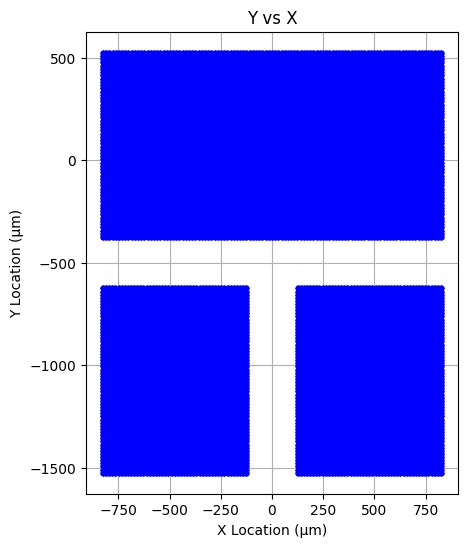

In [6]:
# Plot X and Y
plt.figure(figsize=(8, 6))
plt.plot(X_Location, Y_Location, 'bo', markersize=3)
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Y vs X')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
# plt.show()

In [7]:
grouped_data =  df.groupby(["X Location (µm)","Y Location (µm)"], sort=True, as_index=False)
grouped_data.head()

,X Location (µm),Y Location (µm),Z Location (µm),NLCREQ (µm/µm)
0,-809.52,-1509.5,-669.96,0.111030
1,-809.52,-1509.5,-684.96,0.039228
2,-809.52,-1509.5,-699.96,0.091925
3,-809.52,-1509.5,-714.96,0.373020
4,-794.32,-1509.5,-669.96,0.104670
...,...,...,...,...
71026,748.70,-1525.0,-714.93,0.370110
71027,763.91,-1525.0,-714.93,0.377730
71028,779.11,-1525.0,-714.93,0.390940
71029,794.32,-1525.0,-714.93,0.410000


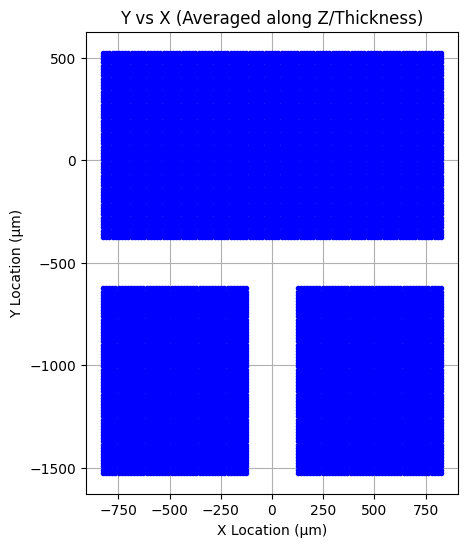

,index,X Location (µm),Y Location (µm),NLCREQ (µm/µm)
0,0,-825.0,-1525.0,0.1965
1,1,-825.0,-1509.5,0.1650
2,2,-825.0,-1494.3,0.1649
3,3,-825.0,-1479.0,0.1769
4,4,-825.0,-1463.8,0.1768


In [8]:
# Group by X and Y Location and calculate the mean of Z Location
grouped_data =  df.groupby(["X Location (µm)","Y Location (µm)"], sort=True, as_index=False)['NLCREQ (µm/µm)'].mean()

# Round 'NLCREQ' values to 4 decimal places
grouped_data['NLCREQ (µm/µm)'] = grouped_data['NLCREQ (µm/µm)'].round(4)

# Reset index to make X and Y Location columns again
grouped_data.reset_index(inplace=True)

# Plot X and Y
plt.figure(figsize=(8, 6))
plt.plot(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'], 'bo', markersize=3)
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Y vs X (Averaged along Z/Thickness)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()
grouped_data.head()

In [9]:
len(X_Location), len(Y_Location), len(NLCREQ)

(71076, 71076, 71076)

In [10]:
# # Drop index before saving if present
# grouped_data = grouped_data.reset_index(drop=True)

# # Save grouped data to a text file without index
# grouped_data.to_csv(r'D:\THI_work\Journal\All_export_2D_grid_all_check\simulation_sac105_without_copper_non_linear\cree\top_avg_21660.txt', index=False, sep='\t', encoding='utf-8')

NLCREQ (µm/µm)
0.0121    1
0.0122    2
0.0124    1
0.0125    5
0.0126    2
         ..
0.1784    2
0.1785    2
0.1788    2
0.1789    2
0.1965    2
Name: count, Length: 1521, dtype: int64


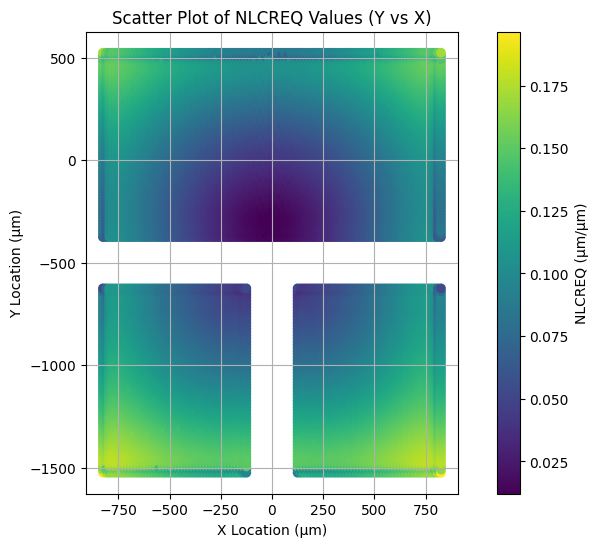

In [11]:
import matplotlib.pyplot as plt

print(grouped_data['NLCREQ (µm/µm)'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sc = plt.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                 c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis')  # viridis is a good colormap for continuous data
plt.colorbar(sc, label='NLCREQ (µm/µm)')
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Scatter Plot of NLCREQ Values (Y vs X)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


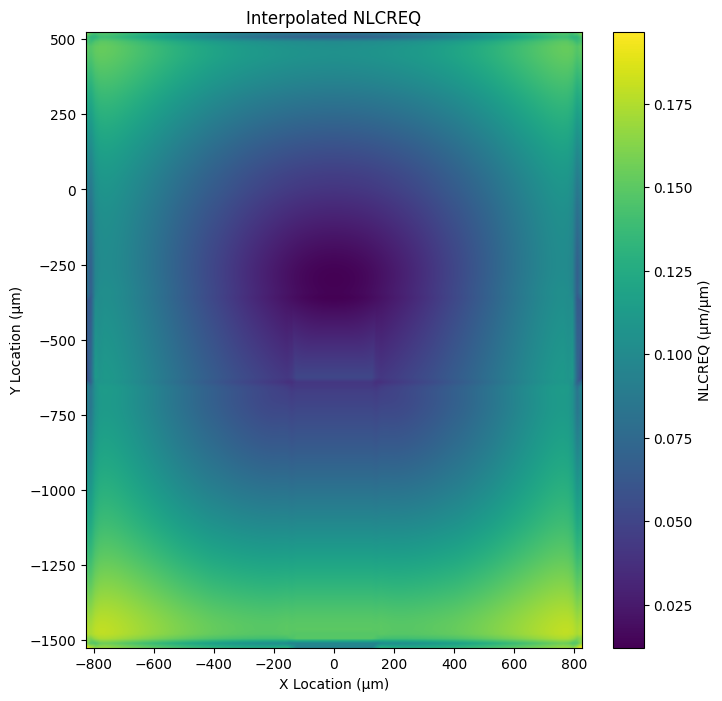

In [20]:
# Perform linear interpolation of NLCREQ values onto XY coordinate grid
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define grid dimensions
grid_size = 2000

# Define grid points
x_vals = np.linspace(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']), grid_size)
y_vals = np.linspace(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']), grid_size)

# Create meshgrid
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate NLCREQ values onto the grid
NLCREQ_interp = griddata((grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']), 
                         grouped_data['NLCREQ (µm/µm)'], (X, Y), method='linear')

# Plot interpolated data
plt.figure(figsize=(8,8))
plt.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis'  # Color map; you can change this according to your preference
)
plt.colorbar(label='NLCREQ (µm/µm)')
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
# plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Interpolated NLCREQ')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)
plt.show()

C:\Users\rupap\AppData\Local\Temp\ipykernel_24992\4155451129.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


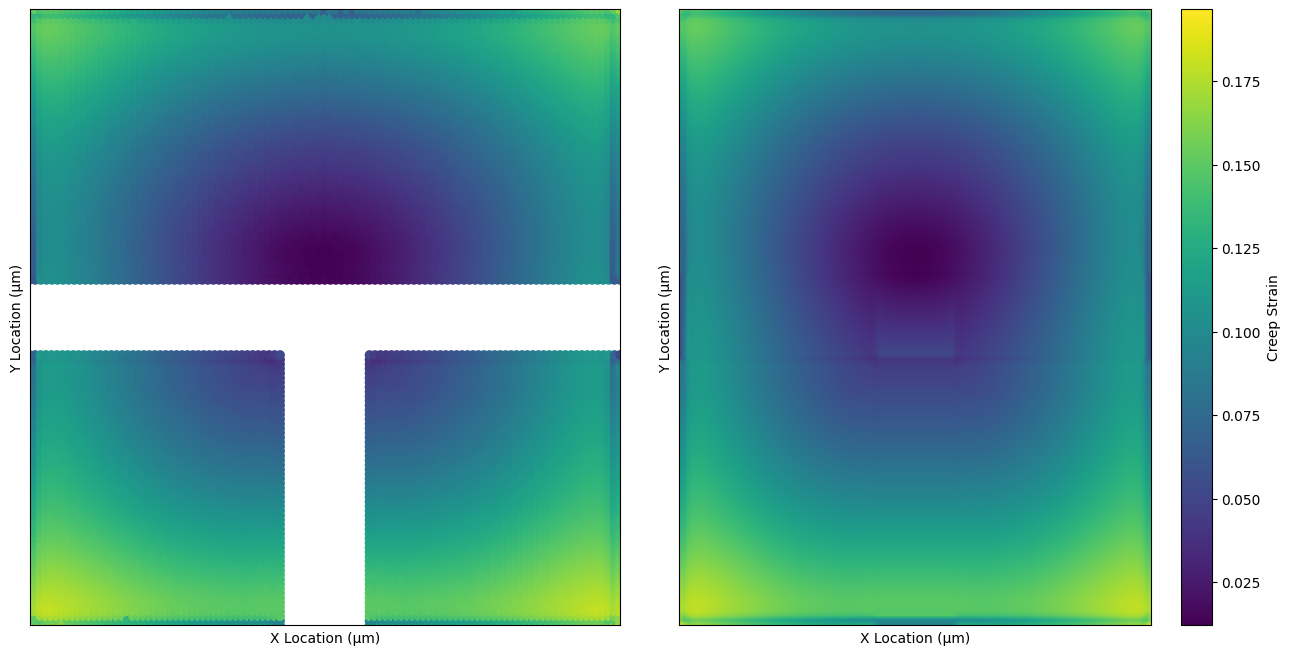

In [ ]:
# Make above both graphs on same axis - side by side, both interpolated

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Assuming 'grouped_data' is your DataFrame with the columns 'X Location (µm)', 'Y Location (µm)', and 'NLCREQ (µm/µm)'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'wspace': 0.10})  # Added space between plots

# Define grid dimensions
grid_size = 5000



# First plot: Scatter plot
sc = ax1.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                 c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis')  # viridis is a good colormap for continuous data
# Removed the colorbar for the scatter plot
ax1.set_xlabel('X Location (µm)')
ax1.set_ylabel('Y Location (µm)')
# ax1.invert_yaxis()  # Invert the y-axis
ax1.grid(False)

# Remove axis numbers (ticks)
ax1.set_xticks([])
ax1.set_yticks([])



# Second plot: Interpolated heatmap
# Define grid points
x_vals = np.linspace(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']), grid_size)
y_vals = np.linspace(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']), grid_size)

# Create meshgrid
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate NLCREQ values linearly onto the grid
NLCREQ_interp = griddata((grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']), 
                         grouped_data['NLCREQ (µm/µm)'], 
                         (X, Y), 
                         method='linear')

im = ax2.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis'  # Color map; you can change this according to your preference
)
cb2 = plt.colorbar(im, ax=ax2, label='Creep Strain')
ax2.set_xlabel('X Location (µm)')
ax2.set_ylabel('Y Location (µm)')
# ax2.invert_yaxis()  # Invert the y-axis
ax2.grid(False)

# Remove axis numbers (ticks)
ax2.set_xticks([])
ax2.set_yticks([])



# Set same scale for scatter plot
ax1.set_xlim(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']))
ax1.set_ylim(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']))

# Adjust layout
# plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


C:\Users\rupap\AppData\Local\Temp\ipykernel_24992\3858718506.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


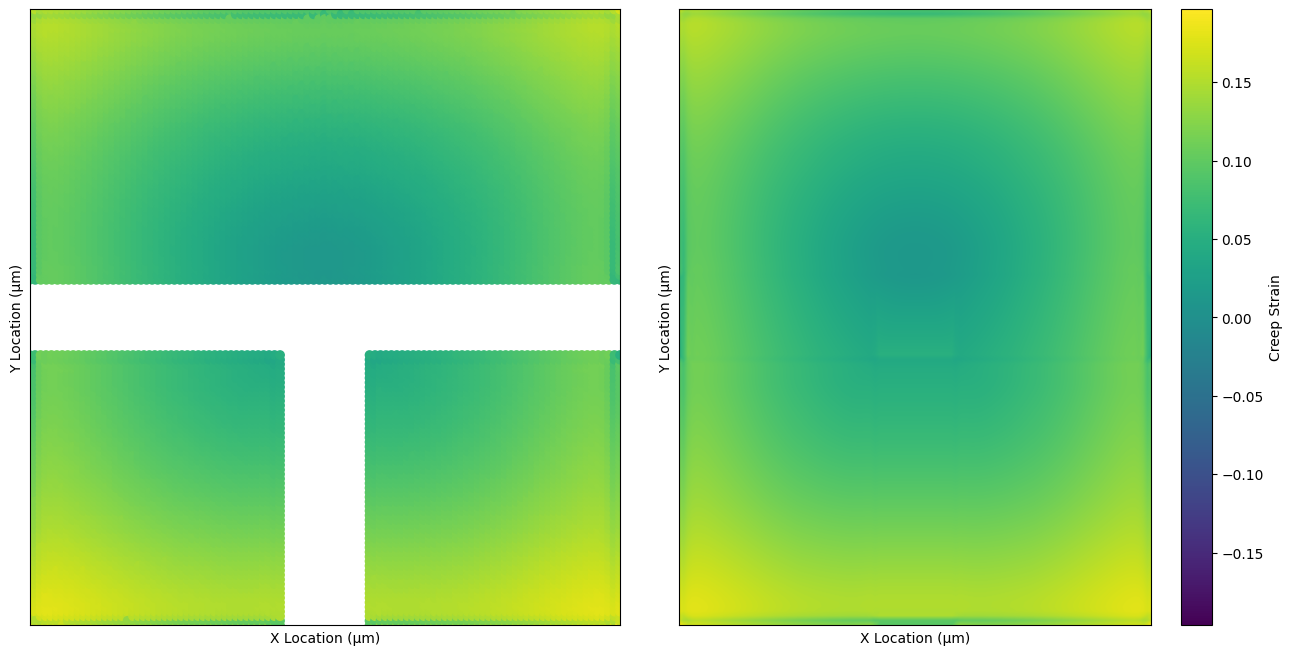

In [14]:
# Same as above but with symmetrical color limits

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Assuming 'grouped_data' is your DataFrame with the columns 'X Location (µm)', 'Y Location (µm)', and 'NLCREQ (µm/µm)'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'wspace': 0.10})  # Added space between plots

# Define grid dimensions
grid_size = 5000

# Determine symmetrical color limits
vmin = min(grouped_data['NLCREQ (µm/µm)'])
vmax = max(grouped_data['NLCREQ (µm/µm)'])
max_abs = max(abs(vmin), abs(vmax))



# First plot: Scatter plot
sc = ax1.scatter(grouped_data['X Location (µm)'], grouped_data['Y Location (µm)'],
                 c=grouped_data['NLCREQ (µm/µm)'], cmap='viridis', vmin=-max_abs, vmax=max_abs)  # symmetrically set color limits
# Removed the colorbar for the scatter plot
ax1.set_xlabel('X Location (µm)')
ax1.set_ylabel('Y Location (µm)')
# ax1.invert_yaxis()  # Invert the y-axis
ax1.grid(False)

# Remove axis numbers (ticks)
ax1.set_xticks([])
ax1.set_yticks([])



# Define grid points
x_vals = np.linspace(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']), grid_size)
y_vals = np.linspace(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']), grid_size)

# Create meshgrid
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate NLCREQ values onto the grid
NLCREQ_interp = griddata((grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']), 
                         grouped_data['NLCREQ (µm/µm)'], (X, Y), method='linear')




# Set same scale for scatter plot
ax1.set_xlim(min(grouped_data['X Location (µm)']), max(grouped_data['X Location (µm)']))
ax1.set_ylim(min(grouped_data['Y Location (µm)']), max(grouped_data['Y Location (µm)']))

# Second plot: Interpolated heatmap
im = ax2.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis',  # Color map; you can change this according to your preference
    vmin=-max_abs, vmax=max_abs  # symmetrically set color limits
)
cb2 = plt.colorbar(im, ax=ax2, label='Creep Strain')
ax2.set_xlabel('X Location (µm)')
ax2.set_ylabel('Y Location (µm)')
# ax2.invert_yaxis()  # Invert the y-axis
ax2.grid(False)

# Remove axis numbers (ticks)
ax2.set_xticks([])
ax2.set_yticks([])



# # Set same scale for heatmap
# ax2.set_xlim(y_vals.min(), y_vals.max())
# ax2.set_ylim(x_vals.min(), x_vals.max())

# Adjust layout
plt.tight_layout()
plt.show()

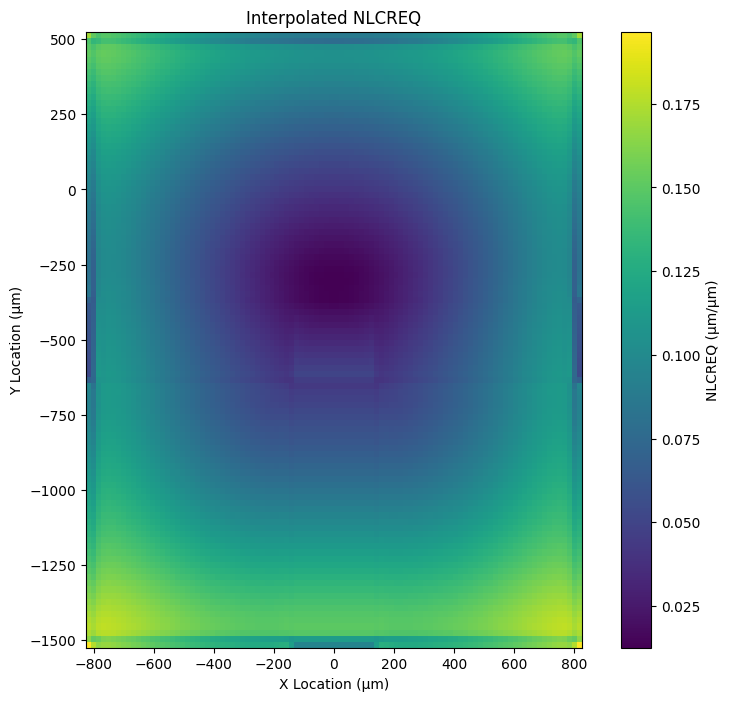

In [ ]:
# create second plot but with small grid size

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Example DataFrame loading; replace with your actual data loading method
# df = pd.read_csv('path_to_your_data.csv')

# Group the data by X and Y location and calculate the mean of NLCREQ
grouped_data = df.groupby(['X Location (µm)', 'Y Location (µm)']).agg({'NLCREQ (µm/µm)': 'mean'}).reset_index()

# Define the grid size and create grid points for interpolation
grid_size = 100

x_vals = np.linspace(grouped_data['X Location (µm)'].min(), grouped_data['X Location (µm)'].max(), grid_size)
y_vals = np.linspace(grouped_data['Y Location (µm)'].min(), grouped_data['Y Location (µm)'].max(), grid_size)

# Create a meshgrid for X and Y coordinates
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate the NLCREQ values onto the grid
NLCREQ_interp = griddata(
    (grouped_data['X Location (µm)'], grouped_data['Y Location (µm)']),
    grouped_data['NLCREQ (µm/µm)'],
    (X, Y),
    method='linear'  # You can change to 'cubic' for smoother interpolation
)

# Plot the interpolated data
plt.figure(figsize=(10, 8))
plt.imshow(
    NLCREQ_interp,
    extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
    origin='lower',
    aspect='auto',  # Adjusts the plot to fill the figure area
    cmap='viridis'  # Color map; you can change this according to your preference
)
plt.colorbar(label='NLCREQ (µm/µm)')
plt.xlabel('X Location (µm)')
plt.ylabel('Y Location (µm)')
plt.title('Interpolated NLCREQ')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)  # Turn off the grid for a cleaner look
plt.show()
